# Time Series Forecasting Of Bitcoin Prices Using Prophet

Prophet is a Python time series forecast library developed by Facebook. Prophet automatically detects yearly, weekly, and daily seasonality. It can quickly decompose the trend and seasonality effects.

In this tutorial, we will make a time-series prediction of Bitcoin prices. The following topics will be covered:

*   How to train a time series forecasting model using Prophet?
*   How to make predictions and do time series decomposition?
*   How to identify changing points in the trend?
*   How to do time series cross-validation?
*   How to evaluate time series model performance using Prophet?

The purpose of this tutorial is machine learning education only. It is not investment advice. Therefore, please do not make an investment based on the information in this tutorial.

## Step 1: Install And Import Libraries
In the first step, we will install and import libraries. Two Python packages need to be installed, yfinance and prophet.

In [1]:
# Install libraries
!pip install yfinance prophet

After the package installation, we need to import libraries for this tutorial.

numpy and pandas are for data processing. yfinance is for pulling the data.

Prophet is for building the time series forecast. .plot is for model output visualization, and .diagnostics is for model performance evaluation.

plotly is imported to visualize the Bitcoin price trend.

In [2]:
# Data processing
import numpy as np
import pandas as pd
# Get time series data
import yfinance as yf
# Prophet model for time series forecast
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
# Visualization
import plotly.graph_objs as go

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Step 2: Get Bitcoin Price Data
In the 2nd step, the Bitcoin price data is downloaded from the Yahoo finance API. We are using two years’ daily data from 2018 and 2019.

Yahoo finance downloads data with the date as an index. Using reset_index, we created a new index and used the date as a column. This is because Prophet requires the date-time variable to be a column for the model input.

By default, the date is a string type, pd.to_datetime changes it to a DateTime format.

https://algotrading101.com/learn/yfinance-guide/

High granularity of data. One cool feature of yfinance is that you can get highly refined data, all the way down to 5 minute, 3 minute and even 1 minute data! The full range of intervals available are:

1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [3]:
# msft = yf.Ticker("MSFT")

# # get historical market data
# hist = msft.history(start="2023-11-01", end=None, interval="1h")

# hist.head(10)

In [4]:
# show share count количество акций
#msft.get_shares_full(start="2022-01-01", end=None)

In [5]:
data = yf.download(tickers='BTC-USD', start='2023-10-20', end='2024-01-24', interval = '60m')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-20 00:00:00,28732.812500,28780.011719,28659.640625,28662.492188,28662.492188,0
2023-10-20 01:00:00,28660.558594,28665.970703,28601.669922,28660.412109,28660.412109,0
2023-10-20 02:00:00,28669.582031,29066.433594,28663.732422,29008.105469,29008.105469,652231680
2023-10-20 03:00:00,28999.750000,29372.421875,28943.271484,29265.113281,29265.113281,1243138048
2023-10-20 04:00:00,29256.332031,29340.470703,29190.591797,29332.753906,29332.753906,556913664
...,...,...,...,...,...,...
2024-01-23 19:00:00,39083.703125,39236.074219,38995.511719,39130.441406,39130.441406,0
2024-01-23 20:00:00,39129.253906,39332.984375,39018.671875,39075.566406,39075.566406,0
2024-01-23 21:00:00,39141.078125,39233.003906,39045.289062,39209.078125,39209.078125,0


In [6]:
# data = yf.download(tickers='BTC-USD', start='2023-11-20', end=None, interval = '1m')
# data

In [7]:
# Download Bitcoin data
data = yf.download(tickers='BTC-USD', start='2023-10-01', end='2024-01-24', interval = '60m')
#data = yf.download(tickers='BTC-USD', start='2023-10-01', end='2023-11-01', period = '60m')
# Reset index and have date as a column
data.reset_index(inplace=True)
# Change date to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])
# Take a look at the data
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume
2754,2024-01-23 19:00:00,39083.703125,39236.074219,38995.511719,39130.441406,39130.441406,0
2755,2024-01-23 20:00:00,39129.253906,39332.984375,39018.671875,39075.566406,39075.566406,0
2756,2024-01-23 21:00:00,39141.078125,39233.003906,39045.289062,39209.078125,39209.078125,0
2757,2024-01-23 22:00:00,39207.542969,39515.234375,39173.402344,39441.988281,39441.988281,0
2758,2024-01-23 23:00:00,39435.164062,39854.058594,39435.164062,39826.386719,39826.386719,291815424


Using .info(), we can see the dataset

In [8]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datetime   2759 non-null   datetime64[ns]
 1   Open       2759 non-null   float64       
 2   High       2759 non-null   float64       
 3   Low        2759 non-null   float64       
 4   Close      2759 non-null   float64       
 5   Adj Close  2759 non-null   float64       
 6   Volume     2759 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.0 KB


In [9]:
# Declare a figure
fig = go.Figure()
# Candlestick chart
fig.add_trace(go.Candlestick(x=data.Datetime,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name = 'Bitcoin Data'))

In this tutorial, we will forecast the Bitcoin close price. Prophet takes two columns as inputs, a datetime column called ds and a value column called y. Therefore, we need to drop all the other columns, rename Date to ds and Close to y.

In [10]:
# Keep only date and close price
df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
# Rename date to ds and close price to y
df.rename(columns={'Datetime': 'ds', 'Close': 'y'}, inplace=True)
# Take a look at the data
df.tail(16)

,ds,y
2743,2024-01-23 08:00:00,39438.515625
2744,2024-01-23 09:00:00,38933.332031
2745,2024-01-23 10:00:00,38909.445312
2746,2024-01-23 11:00:00,38761.878906
2747,2024-01-23 12:00:00,39008.335938
2748,2024-01-23 13:00:00,38854.812500
2749,2024-01-23 14:00:00,38754.246094
2750,2024-01-23 15:00:00,39158.871094
2751,2024-01-23 16:00:00,39300.906250
2752,2024-01-23 17:00:00,39361.332031


Using .info(), we can see that the dataset has 730 records and two columns, ds and y. ds is in DateTime format, and `y’ is in float format. There is no missing data in the dataset.

In [11]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2759 non-null   datetime64[ns]
 1   y       2759 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.2 KB


##Step 3: Train Test Split

In step 3, a training and a testing dataset are created. We cannot use random split for time series data because it causes data leakage from the future dates to the past dates. Usually, a cutoff date is selected. The data before the cutoff date is the training dataset, and the data after the cutoff date is used as the testing dataset.

In this example, ‘2019-11-30’ is used as the cutoff date. The first 23 months are used for model training, and the last month is used for testing.

In [12]:
# Train test split
df_train = df[df['ds']<='2024-01-17 00:00:00']
df_test = df[df['ds']>'2024-01-17 00:00:00']
# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(df_train), 'records, ranging from', df_train['ds'].min(), 'to', df_train['ds'].max())
print('The testing dataset has', len(df_test), 'records, ranging from', df_test['ds'].min(), 'to', df_test['ds'].max())

The training dataset has 2592 records, ranging from 2023-10-01 00:00:00 to 2024-01-17 00:00:00
The testing dataset has 167 records, ranging from 2024-01-17 01:00:00 to 2024-01-23 23:00:00


## Step 4: Train Time Series Model Using Prophet

In step 4, we will train the time series model using the training dataset.

interval_width specifies the prediction interval. We changed the default value of 80% to 95% prediction interval. It makes the upper bound and the lower bound of the prediction broader.

n_changepoints is the number of change points in the time series trend. The default value is 25. Based on the shape of the Bitcoin price data, it was set at 16.

In [13]:
# Create the prophet model with confidence internal of 90%
m = Prophet(interval_width=0.90, n_changepoints=24)
# Fit the model using the training dataset
m.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg551um2/zp9kb3c8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg551um2/nnudv_0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93090', 'data', 'file=/tmp/tmphg551um2/zp9kb3c8.json', 'init=/tmp/tmphg551um2/nnudv_0g.json', 'output', 'file=/tmp/tmphg551um2/prophet_modelszibzz8g/prophet_model-20240125094132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 5: Use Prophet Model To Make Prediction

Step 5 uses the trained Prophet model to make the prediction. We use the last 31 days to create the future dataframe. This is the same as using the testing dataset we created above.

The prediction output contains lots of information. We kept the predicted value yhat and its prediction interval upper and lower bound value.

In [14]:
# Create a future dataframe for prediction
future = m.make_future_dataframe(periods=24, freq='H')
#future = m.make_future_dataframe(periods=7, freq='D')

# Forecast the future dataframe values
forecast = m.predict(future)
# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
2596,2024-01-17 05:00:00,44635.244994,43367.839076,45870.426979
2597,2024-01-17 06:00:00,44639.080959,43352.834212,45887.704030
2598,2024-01-17 07:00:00,44646.222852,43375.937924,45783.997487
2599,2024-01-17 08:00:00,44654.283141,43408.014840,45944.435282
2600,2024-01-17 09:00:00,44663.143724,43327.359273,45835.001031
2601,2024-01-17 10:00:00,44674.174862,43357.073431,45920.856423
2602,2024-01-17 11:00:00,44686.394526,43390.948580,45891.926062
2603,2024-01-17 12:00:00,44694.519107,43454.551810,45852.242633
2604,2024-01-17 13:00:00,44692.550397,43444.226272,45881.386153
2605,2024-01-17 14:00:00,44680.642805,43352.766741,45889.487523


The x-axis is the date in the forecast visualization, and the y axis is the Bitcoin close price. The black dots are the actual prices in the training dataset, and the red dots are the actual forecast prices. The blue line is the time series model prediction. The shaded area is the 95% prediction interval.

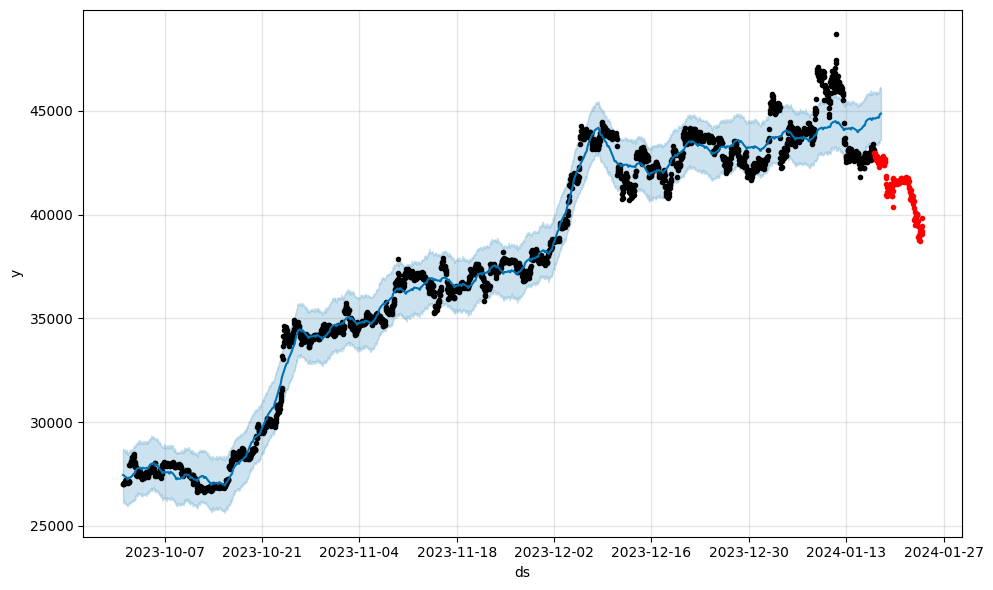

In [15]:
# Visualize the forecast
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'r.')

##Step 6: Time Series Decomposition

In step 6, we will decompose the time series forecast.

From the trend chart, we can see a decreasing trend from early 2018 to early 2019, an increasing trend from April 2019 to July 2019, and a decreasing trend after July 2019.

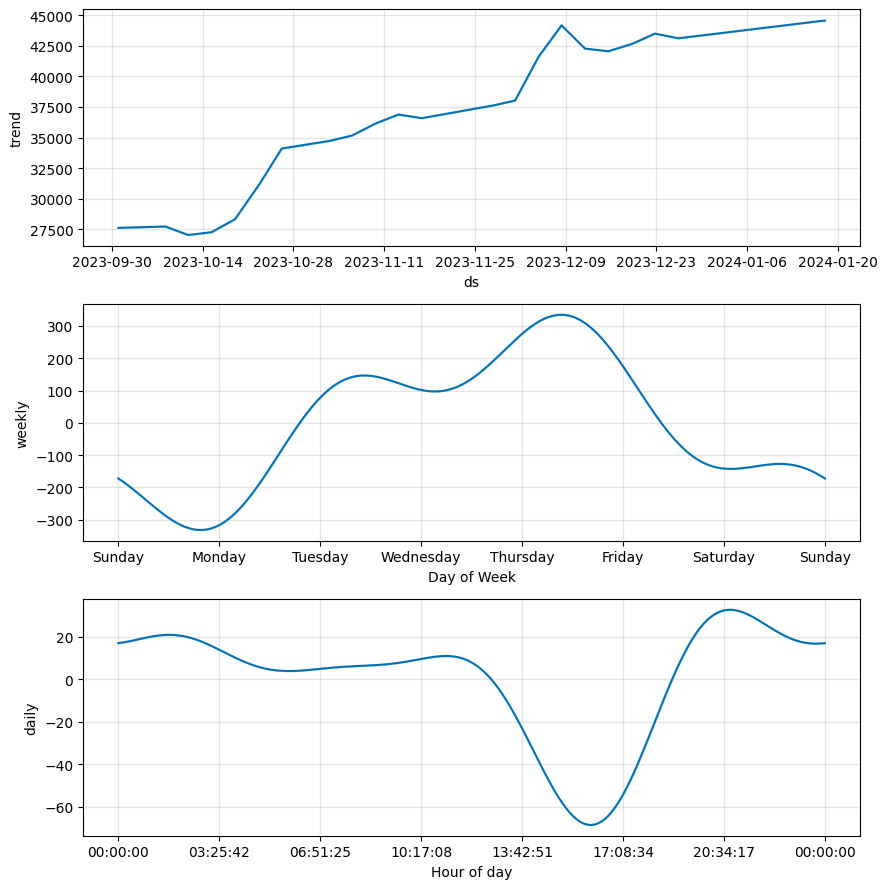

In [16]:
# Visualize the components
m.plot_components(forecast);

##Step 7: Identify Change Points

In step 7, we will discuss how to identify the change points in the time series trend.

Prophet automatically identifies the change points in time series data following the steps below:

1. Use the data in the first 80% of the time series. The percentage of data is Specify the percentage of data used for identifying change points. The default is 80%.
2. Identify a large number of uniformly distributed dates with possible trajectories change.
3. Apply a sparse prior on the magnitudes of the change rate, which is similar to L1 regularization.

We can list the dates corresponding to the changepoints using .changepoints.

In [17]:
# Default change points
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')

There are 24 change points. 
The change points dates are 
                      ds             y
86   2023-10-04 14:00:00  27376.236328
173  2023-10-08 05:00:00  27952.771484
259  2023-10-11 19:00:00  26758.365234
345  2023-10-15 09:00:00  26902.617188
432  2023-10-19 00:00:00  28399.843750
518  2023-10-22 14:00:00  29880.830078
604  2023-10-26 05:00:00  34534.925781
691  2023-10-29 20:00:00  34581.625000
777  2023-11-02 10:00:00  35407.414062
863  2023-11-06 00:00:00  35073.394531
950  2023-11-09 15:00:00  37113.648438
1036 2023-11-13 05:00:00  36942.171875
1122 2023-11-16 19:00:00  35911.933594
1209 2023-11-20 10:00:00  37306.785156
1295 2023-11-24 00:00:00  37293.835938
1381 2023-11-27 14:00:00  36783.625000
1468 2023-12-01 05:00:00  38149.652344
1554 2023-12-04 19:00:00  41950.457031
1640 2023-12-08 09:00:00  43142.871094
1727 2023-12-12 00:00:00  41688.941406
1813 2023-12-15 14:00:00  42166.117188
1899 2023-12-19 04:00:00  42906.878906
1986 2023-12-22 19:00:00  43674.746094
2072 2

In the visualization, the red dotted lines represent the changepoints. It does not include all the seven changepoints in the chart. Only the ones with more changes are included.

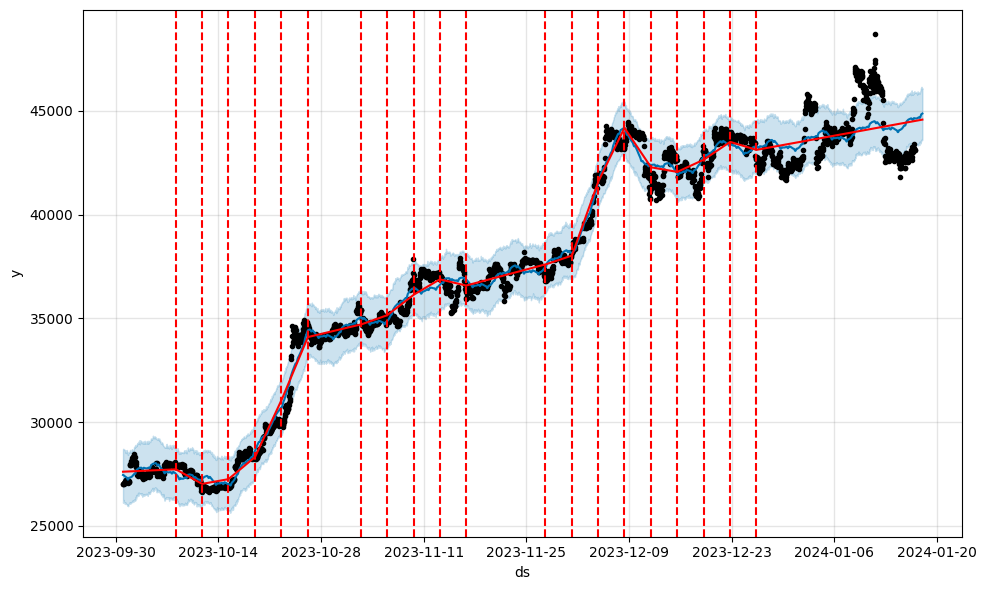

In [18]:
# Change points to plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

##Step 8: Cross Validation

In step 8, we will do cross-validation for the time series model. Prophet has a cross_validation function to automate the comparison between the actual and the predicted values.


*   m is the trained model.
*   initial='500 days' means the initial model will be trained on the first 500 days of data.
*   period='60 days' means 60 days will be added to the training dataset for each additional model.
*   horizon = '30 days' means that the model forecasts the next 30 days. When only horizon is given, Prophet defaults initial to be triple the horizon, and period to be half of the horizon.
*   parallel="processes" enables parallel processing for cross-validation. When the parallel cross-validation can be done on a single machine, processes provide the highest performance. For larger problems, dask can be used to do cross-validation on multiple machines.


__def cross_validation(model, horizon, period=None, initial=None, parallel=None, cutoffs=None, disable_tqdm=False, extra_output_columns=None)__
Cross-Validation for time series.

Computes forecasts from historical cutoff points, which user can input. If not provided, begins from (end - horizon) and works backwards, making cutoffs with a spacing of period until initial is reached.

When period is equal to the time interval of the data, this is the
technique described in https://robjhyndman.com/hyndsight/tscv/ .

Parameters
model: Prophet class object. Fitted Prophet model.
horizon: string with pd.Timedelta compatible style, e.g., '5 days',
    '3 hours', '10 seconds'.
period: string with pd.Timedelta compatible style. Simulated forecast will
    be done at every this period. If not provided, 0.5 * horizon is used.
initial: string with pd.Timedelta compatible style. The first training
    period will include at least this much data. If not provided, 3 * horizon is used.
cutoffs: list of pd.Timestamp specifying cutoffs to be used during
    cross validation. If not provided, they are generated as described above.
parallel : {None, 'processes', 'threads', 'dask', object}
    How to parallelize the forecast computation. By default no parallelism is used.

None : No parallelism.
'processes' : Parallelize with concurrent.futures.ProcessPoolExectuor.
'threads' : Parallelize with concurrent.futures.ThreadPoolExecutor. Note that some operations currently hold Python's Global Interpreter Lock, so parallelizing with threads may be slower than training sequentially.
'dask': Parallelize with Dask. This requires that a dask.distributed Client be created.
object : Any instance with a .map method. This method will be called with single_cutoff_forecast and a sequence of iterables where each element is the tuple of arguments to pass to single_cutoff_forecast
disable_tqdm: if True it disables the progress bar that would otherwise show up when parallel=None
extra_output_columns: A String or List of Strings e.g. 'trend' or ['trend'].
     Additional columns to 'yhat' and 'ds' to be returned in output.

Returns
A pd.DataFrame with the forecast, actual value and cutoff.

In [19]:
# Cross validation
#df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")

# Cross validation
#df_cv = cross_validation(m, initial='480 hours', period='48 hours', horizon = '24 hours', parallel="processes")
df_cv = cross_validation(m, horizon = '24 hours', parallel="processes")
df_cv.head()

INFO:prophet:Making 201 forecasts with cutoffs between 2023-10-08 00:00:00 and 2024-01-16 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7942e9820c70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg551um2/hwxqbaja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg551um2/ehk1brye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg551um2/d9enp0aj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg551um2/7p0nav0c.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78909', 'data', 'file=/tmp/tmphg551um2/hwxqbaja.json', 'init=/tmp/tmphg551um2/d9enp0aj.json', 'output', 'file=/tmp/tmphg551um2/prophet_modeljtiybaz_/prophet_model-20240125094137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
D

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-10-08 01:00:00,28033.351831,27859.804762,28211.200091,28017.728516,2023-10-08
1,2023-10-08 02:00:00,28064.459953,27883.198687,28244.396046,28031.281250,2023-10-08
2,2023-10-08 03:00:00,28097.847820,27908.461248,28289.253374,28082.931641,2023-10-08
3,2023-10-08 04:00:00,28134.078637,27941.808512,28315.547926,27949.314453,2023-10-08
4,2023-10-08 05:00:00,28179.686360,27993.623954,28386.670121,27952.771484,2023-10-08


##Step 9: Prophet Model Performance Evaluation

Step 9 evaluates the cross-validation model performance.


*   Новый пункт
*   Новый пункт


* MSE (Mean Squared Error) sums up the squared difference between actual and prediction and is divided by the number of predictions.
* RMSE (Root Mean Square Error) takes the square root of MSE.
* MAE (Mean Absolute Error) sums up the absolute difference between actual and prediction and is divided by the number of predictions.
* MAPE (Mean Absolute Percentage Error) sums up the absolute percentage difference between actual and prediction and is divided by the number of predictions. MAPE is independent of the magnitude of data, so it can be used to compare different forecasts. But it’s undefined when the actual value is zero.
* MDAPE (Median Absolute Percentage Error) is similar to MAPE. The difference is that it calculates the median instead of taking the average of the absolute percentage difference.
* SMAPE (Symmetric Mean Absolute Percentage Error) is similar to MAPE. The difference is that when calculating absolute percentage error, the denominator is the actual value for MAPE and the average of the actual and predicted value for SMAPE.

__def performance_metrics(df, metrics=None, rolling_window=0.1, monthly=False)__
Compute performance metrics from cross-validation results.

Computes a suite of performance metrics on the output of cross-validation. By default the following metrics are included:
'mse': mean squared error
'rmse': root mean squared error
'mae': mean absolute error
'mape': mean absolute percent error
'mdape': median absolute percent error
'smape': symmetric mean absolute percentage error
'coverage': coverage of the upper and lower intervals

A subset of these can be specified by passing a list of names as the metrics argument.

Metrics are calculated over a rolling window of cross validation predictions, after sorting by horizon. Averaging is first done within each value of horizon, and then across horizons as needed to reach the window size. The size of that window (number of simulated forecast points) is determined by the rolling_window argument, which specifies a proportion of simulated forecast points to include in each window. rolling_window=0 will compute it separately for each horizon. The default of rolling_window=0.1 will use 10% of the rows in df in each window. rolling_window=1 will compute the metric across all simulated forecast points. The results are set to the right edge of the window.

If rolling_window < 0, then metrics are computed at each datapoint with no averaging (i.e., 'mse' will actually be squared error with no mean).

The output is a dataframe containing column 'horizon' along with columns for each of the metrics computed.

Parameters

In [20]:
# Model performance metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
17,0 days 20:00:00,2.015027e+06,1419.516414,1071.696823,0.027346,0.022446,0.027269,0.429935
18,0 days 21:00:00,2.023734e+06,1422.580178,1077.723660,0.027561,0.022074,0.027486,0.427438
19,0 days 22:00:00,2.092334e+06,1446.490333,1093.400375,0.027994,0.022664,0.027926,0.431184
20,0 days 23:00:00,2.159366e+06,1469.478283,1111.470241,0.028494,0.022924,0.028423,0.440309
21,1 days 00:00:00,2.203178e+06,1484.310771,1126.261994,0.028885,0.022756,0.028817,0.435736


plot_cross_validation_metric method from Prophet helps us to plot the cross-validation performance results.

The x-axis is the horizon. Because we set the horizon to be 30 days, the x-axis has a value up to 30.
The y-axis is the metric we are interested in. We use mape as an example in this visualization.
On each day, we can see three dots. This is because there are three models in the cross-validation, and each dot represents the MAPE from one model.
The line is the aggregated performance across all the models. We can see that MAPE value increases with days, which is expected because time series tend to make better predictions for the near future than the far future.

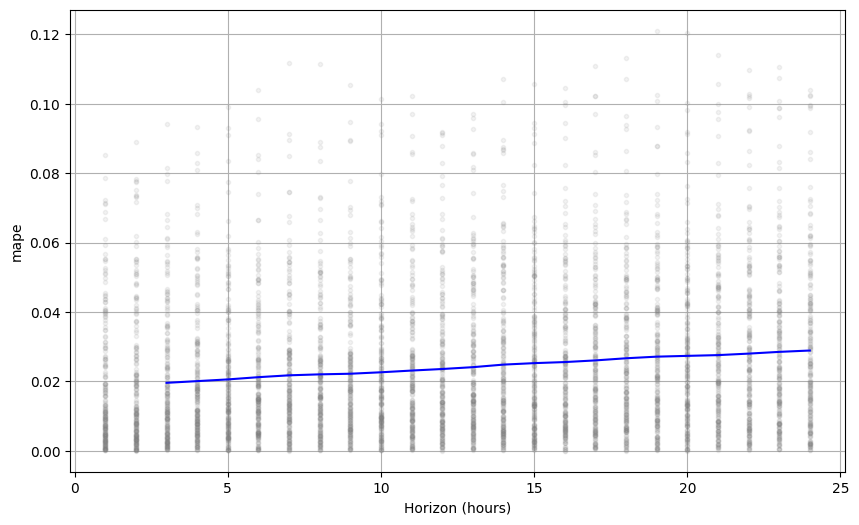

In [21]:
# Visualize the performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mape')

source

https://grabngoinfo.com/time-series-forecasting-of-bitcoin-prices-using-prophet/